<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Sales Prediction Analysis<br></p>

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>Data Source: Bigmart Sales Data Set from Analytics Vidhya</p>

The objective of this analysis is to fit a regression model to predict the amount of sales a store makes.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("train.csv")
df.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

In [42]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

The histogram of sales is heavily skewed towards 25% quartile range.

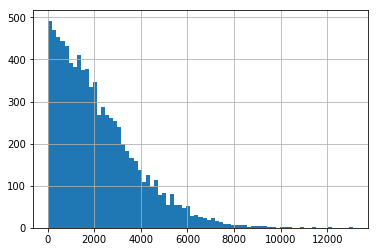

In [39]:
df['Item_Outlet_Sales'].hist(bins = 75)

Bar chart showing the mean sales of each Location Type and Outlet Type.
Tier 2 and 3 sales are nearly identical whereas Tier 1 lags slightly behind.
The supermarket Type3 has the greatest sales, followed by supermarket Type1, supermarket Type2, and Grocery Store.

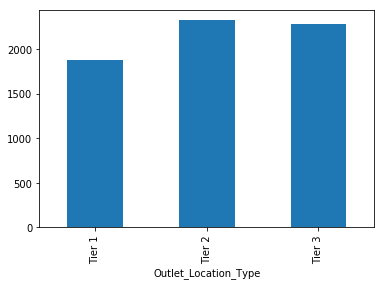

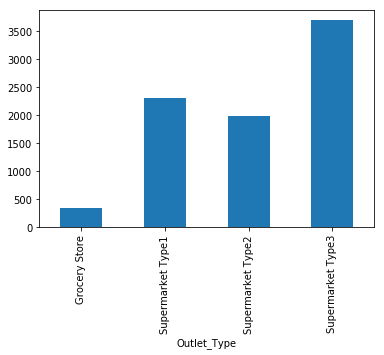

In [18]:
temp1 = df.pivot_table(values = 'Item_Outlet_Sales', index = ['Outlet_Location_Type'], aggfunc = np.mean)
#fig = plt.figure(figsize=(8,4))
temp1.plot(kind = 'bar', legend = False)

temp2 = df.pivot_table(values = 'Item_Outlet_Sales', index = ['Outlet_Type'], aggfunc = np.mean)
temp2.plot(kind='bar', legend = False)

The 'Item_Fat_Content' variable has multiple labels for 'Low Fat' and 'Regular' fat products so I've binned them together.

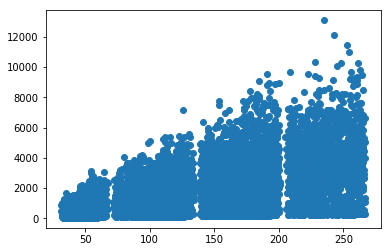

In [19]:
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

The sales of low fat and regular fat products are nearly identical

                  Item_Outlet_Sales
Item_Fat_Content                   
Low Fat                 2157.711534
Regular                 2224.561170


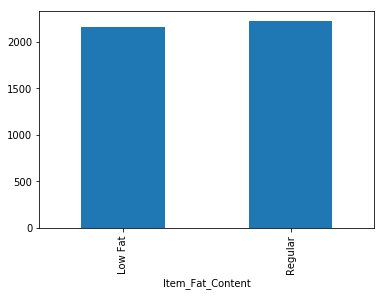

In [22]:
temp3 = df.pivot_table(values = 'Item_Outlet_Sales', index = ['Item_Fat_Content'], aggfunc = np.mean)
print(temp3)
temp3.plot(kind = 'bar', legend = False)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


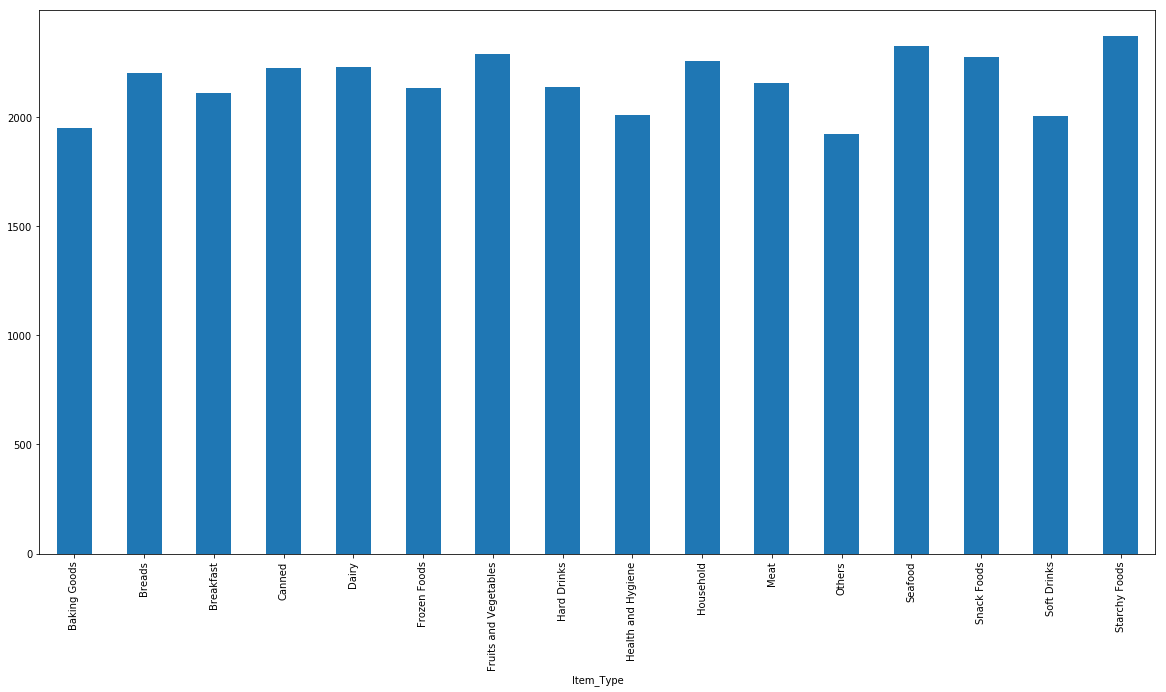

In [23]:
print(df['Item_Type'].value_counts())
temp4 = df.pivot_table(values = 'Item_Outlet_Sales', index = ['Item_Type'], aggfunc = np.mean)
temp4.plot(kind='bar',figsize=(20,10), legend = False)

There are many missing values in "Item_Weight" and "Outlet_Size"

In [24]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The following code finds all missing values in 'Item_Weight' and replaces it with the mean weight of its corresponding 'Item_Type'

In [27]:
mean_weights = df.pivot_table(values = 'Item_Weight', index = ['Item_Type'], aggfunc = np.mean)
for i in range(0, len(df['Item_Type'])):
    curr_item = df.loc[i, ('Item_Type')]
    if df['Item_Weight'].isna()[i]:
        df.loc[i, ('Item_Weight')] = mean_weights['Item_Weight'][curr_item]    

In [28]:
df.apply(lambda x: sum(x.isnull()), axis = 0)

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
out_size_type = pd.crosstab(df['Outlet_Size'], 
                            columns = [df['Outlet_Type'], df['Outlet_Location_Type']])
out_size_sales = df.pivot_table(values = ['Item_Outlet_Sales'], 
                                index = ['Outlet_Size','Outlet_Location_Type'])
out_size_type

Outlet_Type          Grocery Store Supermarket Type1                \
Outlet_Location_Type        Tier 1            Tier 1 Tier 2 Tier 3   
Outlet_Size                                                          
High                             0                 0      0    932   
Medium                           0               930      0      0   
Small                          528               930    930      0   

Outlet_Type          Supermarket Type2 Supermarket Type3  
Outlet_Location_Type            Tier 3            Tier 3  
Outlet_Size                                               
High                                 0                 0  
Medium                             928               935  
Small                                0                 0

The following code fills all missing values in "Outlet_Size" according to its corresponding "Outlet_Type" and "Outlet_Location_Type"

In [31]:
small = True
for i in range(0, len(df['Outlet_Type'])):
    curr_type = df.loc[i, ('Outlet_Type')]
    curr_loc = df.loc[i, ('Outlet_Location_Type')]
    if df['Outlet_Size'].isna()[i]:
        if curr_type == 'Supermarket Type(2|3)':
            df.loc[i, ('Outlet_Size')] = 'Medium'
        elif curr_type == 'Supermarket Type1':
            if curr_loc == 'Tier2':
                df.loc[i, ('Outlet_Size')] = 'Small'
            elif curr_loc == 'Tier3':
                df.loc[i, ('Outlet_Size')] = 'High'
            elif 'Tier1' and small:
                df.loc[i, ('Outlet_Size')] = 'Small'
                small = False
            elif 'Tier1' and not small:
                df.loc[i, ('Outlet_Size')] = 'Medium'
                small = True
        else:
            df.loc[i, ('Outlet_Size')] = 'Small'


Transform all categorical variables into numeric.

In [32]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content','Item_Type', 'Outlet_Size',
          'Outlet_Location_Type', 'Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [47]:
df_test = pd.read_csv('test.csv')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

mean_weights = df_test.pivot_table(values = 'Item_Weight', index = ['Item_Type'], aggfunc = np.mean)
for i in range(0, len(df_test['Item_Type'])):
    curr_item = df_test.loc[i, ('Item_Type')]
    if df_test['Item_Weight'].isna()[i]:
        df_test.loc[i, ('Item_Weight')] = mean_weights['Item_Weight'][curr_item]
        
small = True
for i in range(0, len(df_test['Outlet_Type'])):
    curr_type = df_test.loc[i, ('Outlet_Type')]
    curr_loc = df_test.loc[i, ('Outlet_Location_Type')]
    if df_test['Outlet_Size'].isna()[i]:
        if curr_type == 'Supermarket Type(2|3)':
            df_test.loc[i, ('Outlet_Size')] = 'Medium'
        elif curr_type == 'Supermarket Type1':
            if curr_loc == 'Tier2':
                df_test.loc[i, ('Outlet_Size')] = 'Small'
            elif curr_loc == 'Tier3':
                df_test.loc[i, ('Outlet_Size')] = 'High'
            elif 'Tier1' and small:
                df_test.loc[i, ('Outlet_Size')] = 'Small'
                small = False
            elif 'Tier1' and not small:
                df_test.loc[i, ('Outlet_Size')] = 'Medium'
                small = True
        else:
            df_test.loc[i, ('Outlet_Size')] = 'Small'


In [34]:
from sklearn import linear_model
from sklearn.model_selection import KFold #For K-fold cross validation
from sklearn import metrics

def regression_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    
    predictions = model.predict(data[predictors])
    
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_splits=5)
    error = []
    for train, test in kf:
        #Filter training data
        train_predictors = (data[predictors].iloc[train,:])
        
        #The target we're using to train the algo
        train_target = data[outcome].iloc[train]
        
        #Training algo using predictors and target
        model.fit(train_predictors, train_target)
        
        #Record error form each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    #Fit the model again so that it can be referred outside the function
    model.fit(data[predictors],data[outcome])